In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import shuffle
from scipy import stats

In [2]:
data = pd.read_csv('/Users/_fangkhai/Documents/INFY Historical Data (2009-2019).csv').fillna(0)
data.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [3]:
data["Date"] = pd.to_datetime(data["Date"])

In [4]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-12-31,731.15,729.70,737.75,725.45,6.93M,-0.24%
1,2019-12-30,732.90,736.10,737.95,727.25,5.37M,-0.55%
2,2019-12-27,736.95,729.75,737.50,728.85,3.40M,1.10%
3,2019-12-26,728.95,732.00,734.55,726.55,3.82M,-0.61%
4,2019-12-24,733.40,736.95,736.95,728.30,2.89M,-0.35%


In [5]:
data.set_index("Date")

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-12-31,731.15,729.70,737.75,725.45,6.93M,-0.24%
2019-12-30,732.90,736.10,737.95,727.25,5.37M,-0.55%
2019-12-27,736.95,729.75,737.50,728.85,3.40M,1.10%
2019-12-26,728.95,732.00,734.55,726.55,3.82M,-0.61%
2019-12-24,733.40,736.95,736.95,728.30,2.89M,-0.35%
...,...,...,...,...,...,...
2009-01-07,147.28,145.25,148.52,142.08,22.54M,1.63%
2009-01-06,144.92,146.34,147.58,142.05,11.56M,-0.36%
2009-01-05,145.45,141.38,146.93,141.35,11.24M,3.60%


In [6]:
data = data[data["Date"].between('2016-12-31', '2019-12-31')]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 0 to 738
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      739 non-null    datetime64[ns]
 1   Price     739 non-null    float64       
 2   Open      739 non-null    float64       
 3   High      739 non-null    float64       
 4   Low       739 non-null    float64       
 5   Vol.      739 non-null    object        
 6   Change %  739 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 46.2+ KB


In [8]:
data["Vol."] = data["Vol."].str.replace("M", "")
data["Change %"] = data["Change %"].str.replace("%", "")

In [9]:
data['Vol.'] = pd.to_numeric(data['Vol.'], errors='coerce')
data['Change %'] = pd.to_numeric(data['Change %'], errors='coerce')

In [10]:
data.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        2
Change %    0
dtype: int64

In [11]:
data.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.               float64
Change %           float64
dtype: object

In [12]:
data = data.fillna(data["Vol."].mean())

In [13]:
data.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [14]:
data.set_index("Date", inplace = True)

In [15]:
z = np.abs(stats.zscore(data))
z

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-12-31,0.989531,0.977175,0.981617,1.006130,0.252291,0.193537
2019-12-30,1.004558,1.032192,0.983318,1.021758,0.421101,0.391198
2019-12-27,1.039333,0.977605,0.979491,1.035649,0.634278,0.660869
2019-12-26,0.970641,0.996947,0.954407,1.015680,0.588829,0.429455
2019-12-24,1.008851,1.039499,0.974814,1.030874,0.689466,0.263674
...,...,...,...,...,...,...
2017-01-06,1.147121,1.052873,1.078212,1.122842,0.554969,1.570787
2017-01-05,1.045286,1.024333,1.033314,1.033679,0.113779,0.142527
2017-01-04,1.038503,1.052272,1.055678,1.018659,0.237141,0.208161


In [16]:
(np.abs(stats.zscore(data)) > 3).sum()

Price       0
Open        0
High        0
Low         0
Vol.        8
Change %    5
dtype: int64

In [17]:
data_clean = data[((np.abs(stats.zscore(data)))<3).all(axis=1)]
data_clean

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-12-31,731.15,729.70,737.75,725.45,6.93,-0.24
2019-12-30,732.90,736.10,737.95,727.25,5.37,-0.55
2019-12-27,736.95,729.75,737.50,728.85,3.40,1.10
2019-12-26,728.95,732.00,734.55,726.55,3.82,-0.61
2019-12-24,733.40,736.95,736.95,728.30,2.89,-0.35
...,...,...,...,...,...,...
2017-01-06,482.31,493.55,495.51,480.23,14.39,-2.40
2017-01-05,494.17,496.87,500.79,490.50,8.21,-0.16
2017-01-04,494.96,493.62,498.16,492.23,7.07,0.39


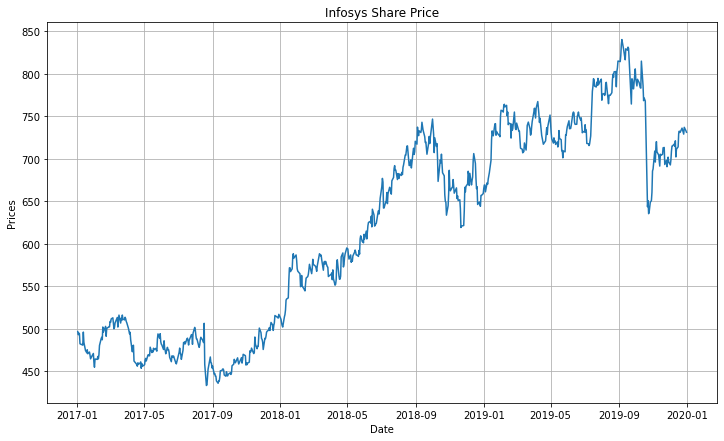

In [18]:
plt.figure(figsize=(12,7))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Prices")
plt.plot(data["Price"])
plt.title("Infosys Share Price")
plt.show()

<AxesSubplot:ylabel='Density'>

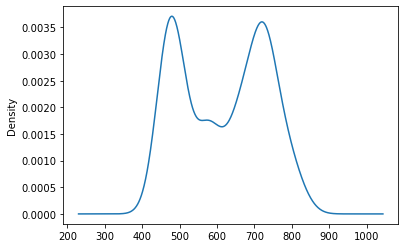

In [19]:
df = data["Price"]
df.plot(kind = "kde")

### SelectKBest

In [20]:
open_price_crosstab = pd.crosstab(data["Open"], data["Price"], margins = True)
open_price_crosstab

Price,433.27,434.27,435.9,438.41,438.56,438.68,442.7,442.9,444.16,444.29,...,820.7,821.3,827.7,829.1,829.3,829.85,831.25,834.05,840.15,All
Open,,,,,,,,,,,,,,,,,,,,,
436.55,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
437.81,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
438.78,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
439.28,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
441.71,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
832.05,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
836.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [21]:
high_price_crosstab = pd.crosstab(data["High"], data["Price"], margins = True)
high_price_crosstab

Price,433.27,434.27,435.9,438.41,438.56,438.68,442.7,442.9,444.16,444.29,...,820.7,821.3,827.7,829.1,829.3,829.85,831.25,834.05,840.15,All
High,,,,,,,,,,,,,,,,,,,,,
440.32,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
440.39,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
442.4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
444.78,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
445.01,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
837.95,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
840.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [22]:
low_price_crosstab = pd.crosstab(data["Low"], data["Price"], margins = True)
low_price_crosstab

Price,433.27,434.27,435.9,438.41,438.56,438.68,442.7,442.9,444.16,444.29,...,820.7,821.3,827.7,829.1,829.3,829.85,831.25,834.05,840.15,All
Low,,,,,,,,,,,,,,,,,,,,,
426.63,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
431.59,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
433.4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
433.52,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
435.95,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
826.65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
827.55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [23]:
vol_price_crosstab = pd.crosstab(data["Vol."], data["Price"], margins = True)
vol_price_crosstab

Price,433.27,434.27,435.9,438.41,438.56,438.68,442.7,442.9,444.16,444.29,...,820.7,821.3,827.7,829.1,829.3,829.85,831.25,834.05,840.15,All
Vol.,,,,,,,,,,,,,,,,,,,,,
1.09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2.34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2.89,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2.92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61.28,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
90.15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
90.41,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
change_price_crosstab = pd.crosstab(data["Change %"], data["Price"], margins = True)
change_price_crosstab

Price,433.27,434.27,435.9,438.41,438.56,438.68,442.7,442.9,444.16,444.29,...,820.7,821.3,827.7,829.1,829.3,829.85,831.25,834.05,840.15,All
Change %,,,,,,,,,,,,,,,,,,,,,
-16.19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-9.56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-5.4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-5.05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-4.55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4.68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
shuffled_data = shuffle(data, random_state = 95)

#X = Independent Variable
target_col = "Price"
X = data.drop("Price", axis = 1)

#y = Dependent Variable
y = shuffled_data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 95)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(591, 5) (148, 5) (591,) (148,)


In [26]:
X_n = SelectKBest(f_classif, k = 1).fit_transform(X, y)
X_n.shape

#Another method (Giving Same Results)

X_new = SelectKBest(f_classif, k = 1).fit(X_train, y_train)
X_train.columns[X_new.get_support()]

Index(['Vol.'], dtype='object')

In [27]:
pd.crosstab(np.squeeze(X_n), np.squeeze(y))

Price,433.27,434.27,435.90,438.41,438.56,438.68,442.70,442.90,444.16,444.29,...,820.10,820.70,821.30,827.70,829.10,829.30,829.85,831.25,834.05,840.15
row_0,,,,,,,,,,,,,,,,,,,,,
1.09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.89,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60.52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61.28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90.15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
data = data.groupby("Date").sum()

In [29]:
data = data.resample(rule = 'MS').sum()

In [30]:
data.head(10)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2017-01-01,10055.77,10106.10,10174.44,9954.06,229.36,-8.27
2017-02-01,9192.70,9157.53,9279.87,9070.27,165.93,8.82
2017-03-01,11205.40,11172.25,11278.84,11091.50,135.67,1.07
2017-04-01,8452.58,8516.39,8575.56,8399.35,141.63,-10.46
2017-05-01,10447.48,10432.17,10518.74,10340.03,122.60,6.26
2017-06-01,9889.58,9912.25,9996.11,9802.71,157.36,-4.22
2017-07-01,10148.91,10133.08,10291.24,10039.19,169.00,7.97
2017-08-01,9922.37,10028.24,10099.79,9822.99,582.35,-9.10
2017-09-01,9367.79,9390.53,9440.16,9303.28,212.43,-1.56


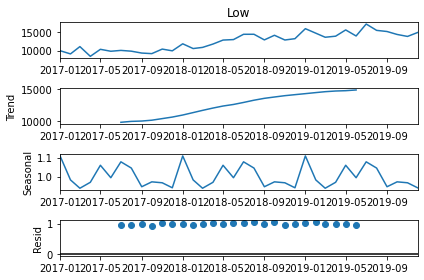

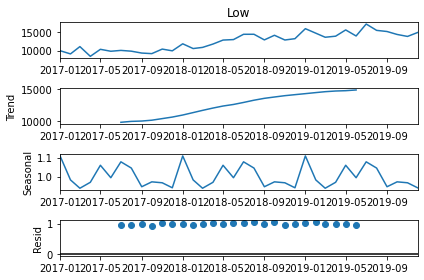

In [31]:
result = seasonal_decompose(data["Low"], model = "multiplicable", period = 12)
result.plot()

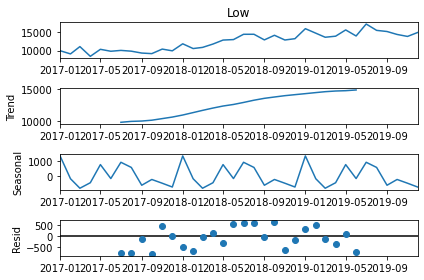

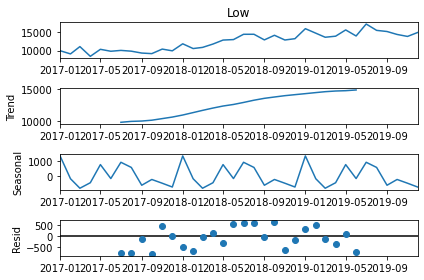

In [32]:
result = seasonal_decompose(data["Low"], model = "additive", period = 12)
result.plot()

In [33]:
train_size = int(len(data) * 0.7)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [34]:
model = ExponentialSmoothing(train["Low"], trend = "add", seasonal = "add", seasonal_periods = 12).fit()

In [35]:
test_pred = model.forecast(11)

In [36]:
test_pred

2019-02-01    14112.083928
2019-03-01    14495.427918
2019-04-01    14905.161441
2019-05-01    16017.226887
2019-06-01    16038.928476
2019-07-01    16210.187816
2019-08-01    16056.555410
2019-09-01    15543.517185
2019-10-01    15607.717298
2019-11-01    16554.005135
2019-12-01    16135.989289
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Date'>

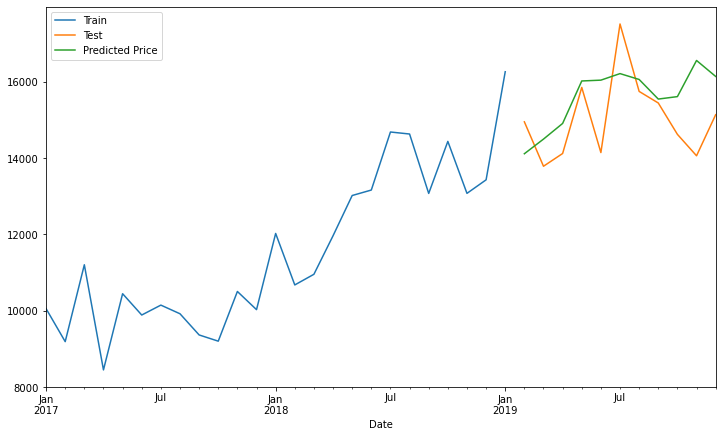

In [37]:
train["Price"].plot(legend = True, label = "Train", figsize = (12, 7))
test["Price"].plot(legend = True, label = "Test")
test_pred.plot(legend = True, label = "Predicted Price")

In [38]:
mape = np.mean(np.abs((test["Price"] - test_pred) / test["Price"])) * 100
mape

6.545059587451858

In [39]:
mae = mean_absolute_error(test["Price"], test_pred)
mae

963.5233903745346

In [40]:
mse = mean_squared_error(test["Price"], test_pred)
mse

1404513.0268024511

In [41]:
rmse = math.sqrt(mse)
rmse

1185.1215240651277

### Final Model Built Based On Entire DataSet (Extra)

In [42]:
# final_model = ExponentialSmoothing(data["Price"], trend = "add", seasonal = "mul", seasonal_periods = 24).fit()

In [43]:
# pred = final_model.forecast(5)

In [44]:
# pred

In [45]:
# data["Price"].plot(legend = True, label = "Price", figsize = (12, 7))
# pred.plot(legend = True, label = "Predicted Price")